<a href="https://colab.research.google.com/github/Air-pollution-and-COVID-19/Experimentos/blob/master/plot_covid_cases_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# What are the google colab shortcuts and understand directory tree
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt # Carga la libreria pyplot para graficar
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp # carga libreria para modificar graficos

In [2]:
rcp['lines.linewidth'] = 2. # grosor de lineas en graficado
rcp['font.family'] = 'sans serif' # Tipo de letra
rcp['font.size'] = 18 # tamaño de letra

In [3]:
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 256 (delta 93), reused 194 (delta 59), pack-reused 0
Receiving objects: 100% (256/256), 42.53 MiB | 26.74 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [4]:
# carga los datos de covid en mexico por estado csv (comma separated value)
cases = np.loadtxt('/content/group_A_AlmaJair/datos_covid/diario_estado.csv', delimiter=',') # Loads cases file

In [5]:
time = cases[0, :] # carga el primer renglon del archivo y todas las columnas
time = np.ma.masked_invalid(time) # ignora datos malos

In [6]:
# Genera las fechas en formato año mes y día
time_final = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                

In [7]:
num2date(time_final[-1]) # convierte entre formato python y formato humano

datetime.datetime(2020, 7, 31, 0, 0, tzinfo=datetime.timezone.utc)

In [8]:
time_final = np.ma.masked_equal(time_final, 0) # ignora datos iguales a zero

In [9]:
cases = np.ma.masked_invalid(cases) # Get rid of invalid values

In [10]:
# Check METADATA to see number and state
meta = open('/content/group_A_AlmaJair/datos_covid/metadata_diario_estado.txt','r').read() # Baja California is 2

In [11]:
meta

'      \nAGUASCALIENTES 1     \nBAJA CALIFORNIA 2     \nBAJA CALIFORNIA SUR 3     \nCAMPECHE 4     \nCHIAPAS 7     \nCHIHUAHUA 8     \nDISTRITO FEDERAL 9     \nCOAHUILA 5     \nCOLIMA 6     \nDURANGO 10     \nGUANAJUATO 11     \nGUERRERO 12     \nHIDALGO 13     \nJALISCO 14     \nMEXICO 15     \nMICHOACAN 16     \nMORELOS 17     \nNAYARIT 18     \nNUEVO LEON 19     \nOAXACA 20     \nPUEBLA 21     \nQUERETARO 22     \nQUINTANA ROO 23     \nSAN LUIS POTOSI 24     \nSINALOA 25     \nSONORA 26     \nTABASCO 27     \nTAMAULIPAS 28     \nTLAXCALA 29     \nVERACRUZ 30     \nYUCATAN 31     \nZACATECAS 32     \nNacional 0     \n'

In [13]:
number_state = cases[:,0] # guarda el codigo de estado en la variable number_state
index = np.where(number_state == 9)[0][0] #Busca el estado con codigo 9 y lo graba en index

In [14]:
# Choose a state
cases_st_bc = cases[index, :] # guarda solo los numeros de casos del estado seleccionado

In [15]:
print(cases_st_bc[3:].shape) # imprime el tamaño de la columna datos Ciudad de México
print(time_final[3:].shape) # imprime el tamaño de la columna fechas

(200,)
(200,)


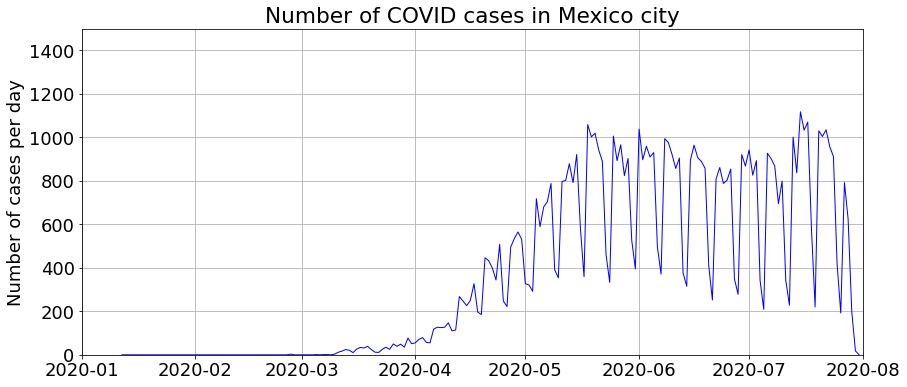

In [22]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6)) # genera una figura
tit = 'Number of COVID cases in Mexico city' # titulo de grafico
units = 'Number of cases per day' # unidades de grafica
# grafica fechas contra los datos de baja california
ax.plot(num2date(time_final[1:]), cases_st_bc[1:], lw=1, color='b')
# ax.plot(num2date(time_final[1:]), np.cumsum(cases_st_bc[1:]), lw=2, color='m')
# ax.bar(num2date(time_final[1:]), cases_st_bc[1:], color='k', alpha=0.5)
ax.set_title(tit) # poner el titulo
ax.set_ylabel(units) # poner el titulo a las coordenadas y
ax.set_ylim(0, 1500)
ax.grid()
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-08', '%Y-%m'))
ax.set_xlim(fi1, fi2)
plt.savefig('figura_Mexico_City.png', bbox_inches='tight')


Porque hay variaciones cada 7 días :D!


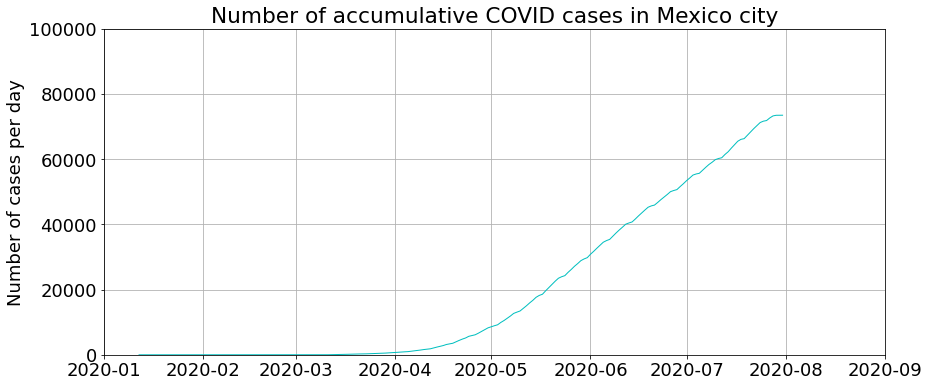

In [26]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Number of accumulative COVID cases in Mexico city'
units = 'Number of cases per day'
ax.plot(num2date(time_final[1:]), np.cumsum(cases_st_bc[1:]), lw=1, color='c')
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 100000)
ax.grid() # genera lineas grises en la grafica
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax.set_xlim(fi1, fi2)
plt.savefig('Figura_Mexico_city_acumulados.png', bbox_inches='tight')

In [27]:
# https://en.climate-data.org/north-america/mexico/lower-california/tijuana-1005196/#temperature-graph
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2020_cdmx.csv', delimiter=',')

In [28]:
temp_mean = temp_mat[:,3] # graba la variable temp mean que esta en la columna 4
temp_min = temp_mat[:,4] # graba la variable temp min que es columna 5
temp_max = temp_mat[:,5] # graba la variable temp max que es columna 6 (python empieza en 0)

In [37]:
year = temp_mat[:,0] # columna 0 es el año
month = temp_mat[:,1] # columna 1 es el mes
day = temp_mat[:,2] # columna 2 es el dia
time_final_temp = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_temp[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii]))) # Lo convierte a formato Python en un loop renglon por renglon

No handles with labels found to put in legend.


NameError: ignored

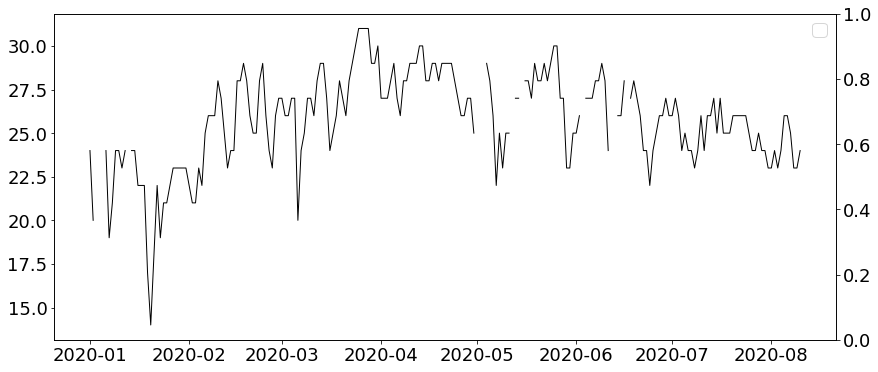

In [38]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Mean Temperature and Number of Cases in Mexico City'
ax1 = ax # eje de las y del lado izquiero se llama ax1
# label es para poner nombre a la linea que graficamos
# ax1.plot(num2date(time_final_temp), temp_mean, lw=1, color='m', label='temp')
# ax1.plot(num2date(time_final_temp), temp_min, lw=1, color='r')
ax1.plot(num2date(time_final_temp), temp_max, lw=1, color='k')
ax1.legend(loc=1) # pone el titulo de cada linea
ax2 = ax1.twinx() # eje de las y del lado derecho se llama ax2
ax2.plot(num2date(time_final_ct[1:]), cases_tj[1:], lw=1, color='g', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2) # pone el titulo de cada linea
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperature $^oC$')
plt.savefig('Figura_Ciudad_de_Mexico_temp.png', bbox_inches='tight')

Text(0, 0.5, 'Mean Temperature BC $^o$C')

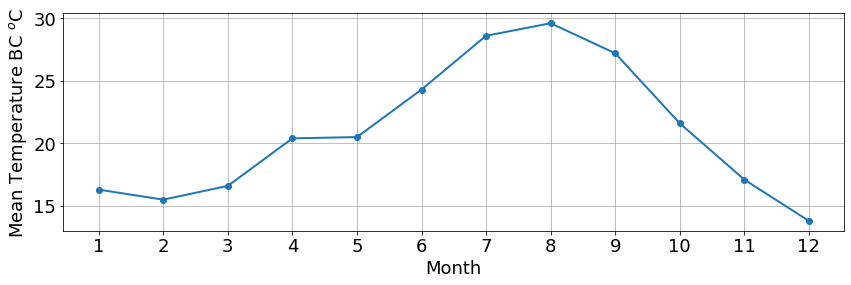

In [ ]:
# Mean Temperature Baja California
temp_mean_2019 = np.asarray([16.3, 15.5, 16.6, 20.4, 20.5, 24.3, 28.6, 29.6, 27.2, 21.6, 17.1, 13.8])
month = np.arange(1, 13, 1)
fig, axs = plt.subplots(1,1, figsize=(14,4))
axs.plot(month, temp_mean_2019, 'o-')
axs.set_xticks(month);
axs.grid()
axs.set_xlabel('Month')
axs.set_ylabel('Mean Temperature BC $^o$C')

In [ ]:
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2019_tijuana.csv', delimiter=',')

In [ ]:
year = temp_mat[:,0]
month = temp_mat[:,1]
day = temp_mat[:,2]
time_final_2019 = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_2019[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii])))

In [ ]:
temp_mean_19 = temp_mat[:,3]
temp_min_19 = temp_mat[:,4]
temp_max_19 = temp_mat[:,5]
prec_19 = temp_mat[:, 6]

Text(0.5, 0.98, 'Tijuana Temperature 2019')

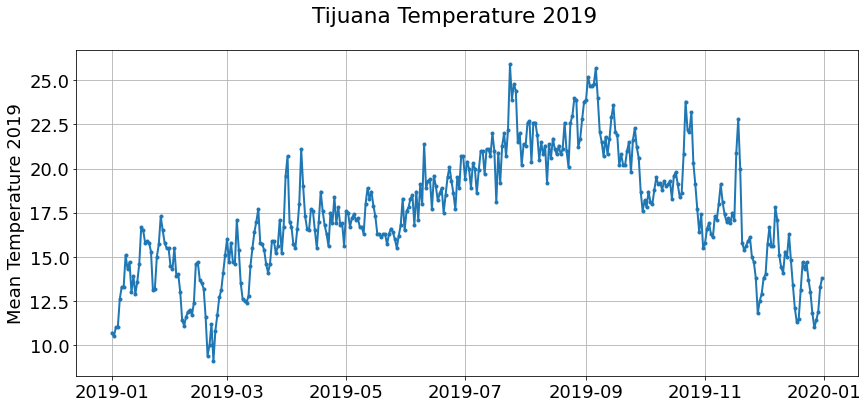

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(14, 6))
axs.plot(num2date(time_final_2019), temp_mean_19, '.-')
axs.grid()
#axs.set_xlabel('Month')
axs.set_ylabel('Mean Temperature 2019')
fig.suptitle('Tijuana Temperature 2019')

Text(0.5, 0.98, 'Tijuana rain 2019')

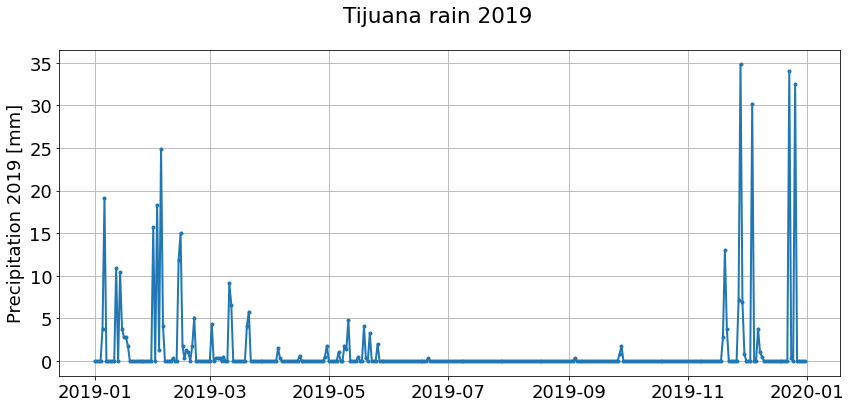

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(14, 6))
axs.plot(num2date(time_final_2019), prec_19, '.-')
axs.grid()
#axs.set_xlabel('Month')
axs.set_ylabel('Precipitation 2019 [mm]')
fig.suptitle('Tijuana rain 2019')

# If Covid existed in 2019? Do you think temperature and rain would have an impact in COVID-19?

In [ ]:
# Casos diarios Tijuana